In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.shape

(8807, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [11]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


<Axes: >

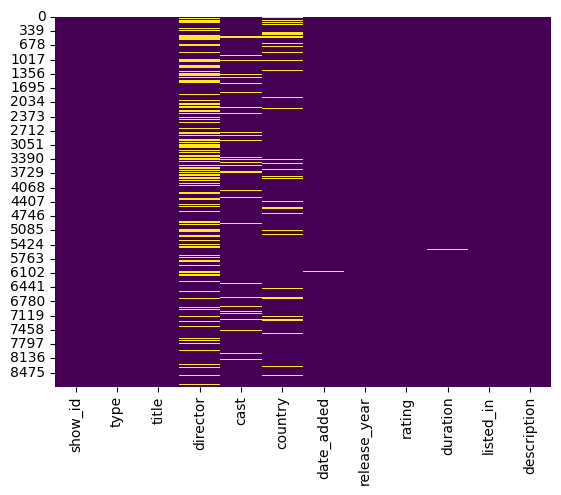

In [16]:
sns.heatmap(df.isnull(),cbar = False,cmap='viridis')

Univariate Analysis

In [5]:
df['director'] = df['director'].fillna("Unknown")


In [6]:
df.dropna(subset=['date_added'], inplace=True)

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors= 'coerce')

In [8]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [9]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

In [10]:
#clean up the listed_in column(genres)
df['genres'] =df['listed_in'].str.split(',')

Bivariate Analysis

<Axes: ylabel='count'>

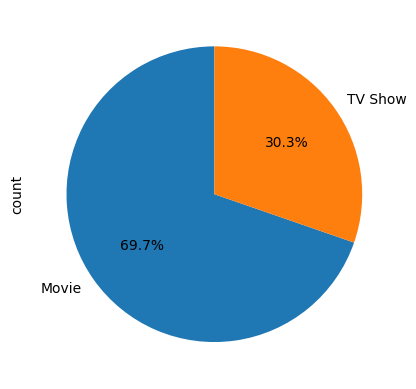

In [11]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)


<Axes: xlabel='country'>

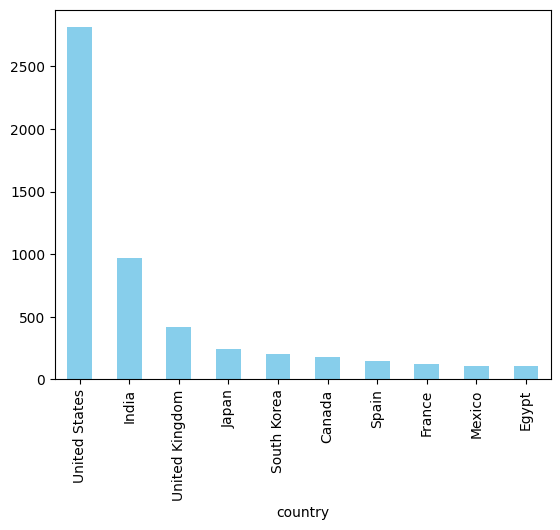

In [12]:
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')


<Axes: xlabel='year_added'>

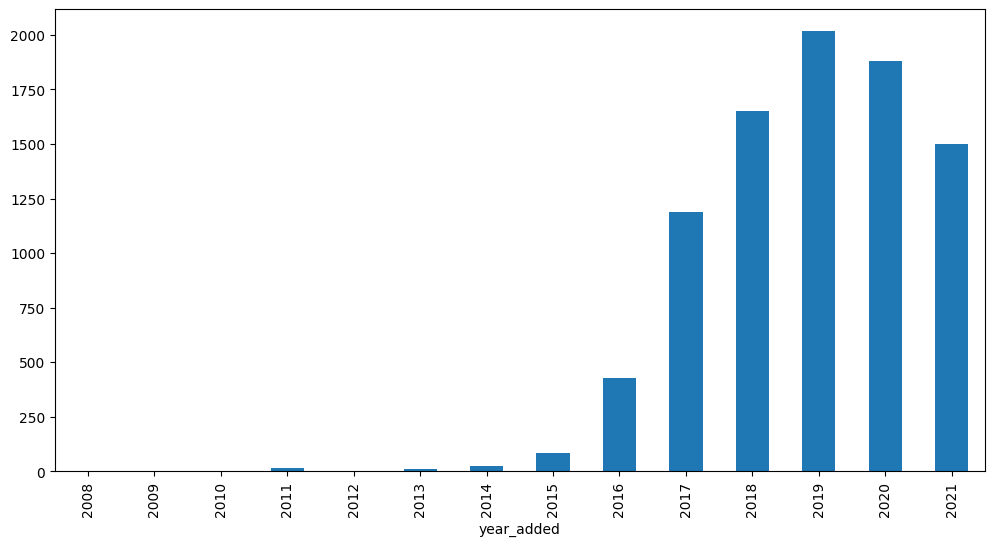

In [13]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))


<Axes: >

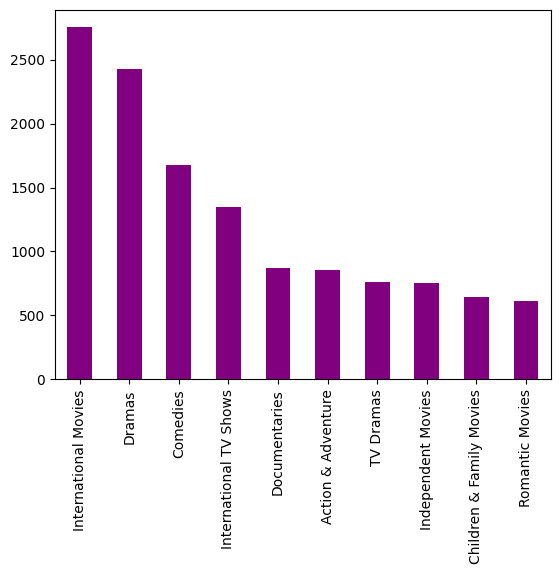

In [14]:
from collections import Counter
genres = df['listed_in'].str.split(', ').sum()
pd.Series(Counter(genres)).sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
#counter counts the no of times a genre has appeared

In [15]:
content_by_year =  df.groupby(['year_added','type']).size().unstack().fillna(0)

<Axes: xlabel='year_added'>

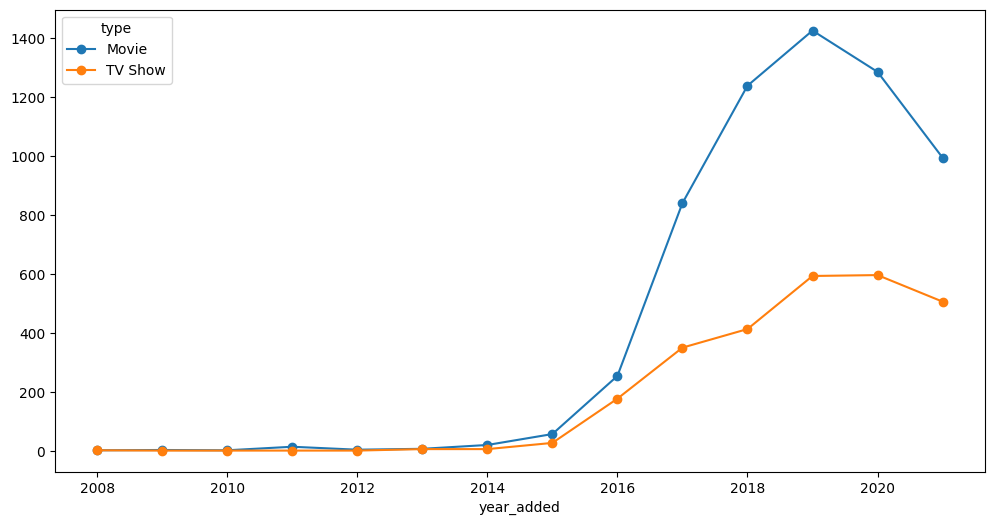

In [16]:
content_by_year.plot(kind='line', marker='o', figsize=(12,6))

<Axes: xlabel='duration_num', ylabel='Count'>

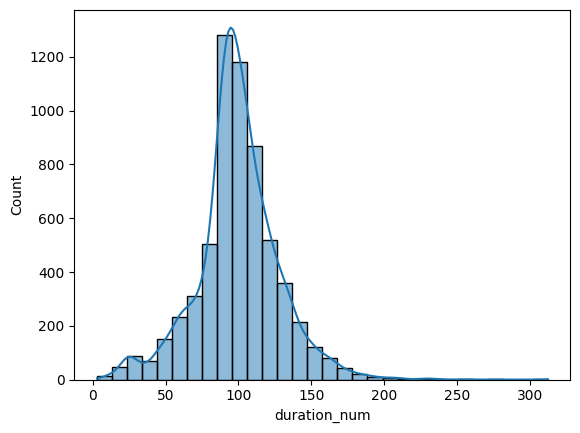

In [18]:
#Duration Distribution of Movies
movie_df = df[df['type'] == 'Movie']
sns.histplot(movie_df['duration_num'], bins=30,kde=True)

<Axes: ylabel='director'>

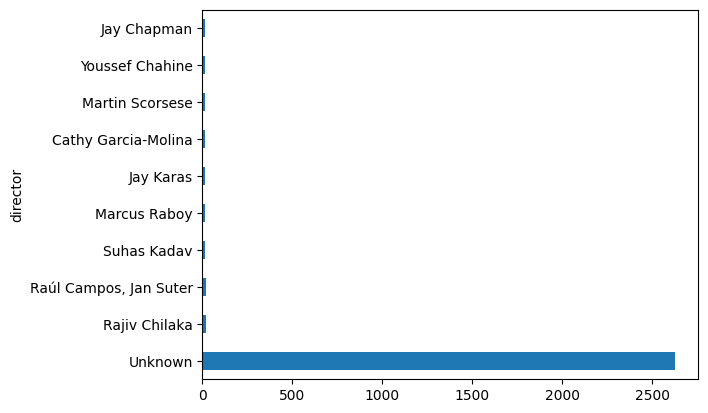

In [20]:
#Common Directors
df['director'].value_counts().head(10).plot(kind='barh')